In [1]:
using RLIntro
using StatsBase, Plots

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1273


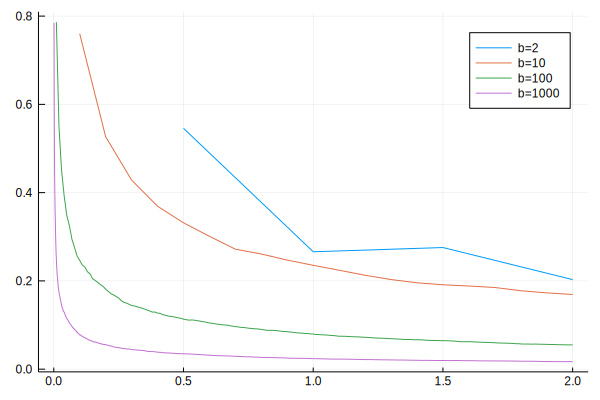

In [2]:
function run_once(b)
    rms = Float64[]
    distribution = randn(b)
    expectation = mean(distribution)
    sample_avg = SampleAvg()
    
    for i in 1:2*b
        avg = sample_avg(distribution[rand(1:b)])
        push!(rms, abs(avg - expectation))
    end
    rms
end

n_runs = 1000
p = plot(legend=:topright)

for b in [2, 10, 100, 1000]
    rms = mean(run_once(b) for _ in 1:n_runs)
    xs = (1:2*b) ./ b
    plot!(p, xs, rms, label="b=$b")
end

p
